In [111]:
# Install libraries
!pip install prophet

In [112]:
!pip install yfinance

In [113]:
# Dependencies
import requests
import time
from dotenv import load_dotenv
import pandas as pd
import json
import os
from datetime import datetime
from pathlib import Path
%matplotlib inline

In [114]:
# import AAPL stock data from 2016 to 2024
import yfinance as yf
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'AAPL', 
data = yf.download(ticker, start_date, end_date)
print(data.tail())

filedata = data.to_csv('AAPL.csv')

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228.460007  229.520004  227.300003  227.789993  227.789993   
2024-09-30  230.039993  233.000000  229.649994  233.000000  233.000000   

              Volume  
Date                  
2024-09-24  43556100  
2024-09-25  42308700  
2024-09-26  36636700  
2024-09-27  34026000  
2024-09-30  54541900  


In [115]:
# import GOOGL stock data from 2016 to 2024
import yfinance as yf
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'GOOGL', 
data = yf.download(ticker, start_date, end_date)
print(data.tail())

filedata = data.to_csv('GOOGL.csv')

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-24  163.029999  163.220001  160.690002  162.289993  162.289993   
2024-09-25  161.470001  162.809998  161.300003  161.490005  161.490005   
2024-09-26  163.639999  164.080002  162.279999  162.729996  162.729996   
2024-09-27  162.809998  165.699997  162.630005  163.949997  163.949997   
2024-09-30  163.320007  166.149994  163.259995  165.850006  165.850006   

              Volume  
Date                  
2024-09-24  23332100  
2024-09-25  18869200  
2024-09-26  20319300  
2024-09-27  21101300  
2024-09-30  20413900  


In [116]:
# import MSFT stock data from 2016 to 2024
import yfinance as yf
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'MSFT', 
data = yf.download(ticker, start_date, end_date)
print(data.tail())

filedata = data.to_csv('MSFT.csv')

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-24  433.000000  433.350006  426.100006  429.170013  429.170013   
2024-09-25  429.829987  433.119995  428.570007  432.109985  432.109985   
2024-09-26  435.089996  435.299988  429.130005  431.309998  431.309998   
2024-09-27  431.519989  431.850006  427.470001  428.019989  428.019989   
2024-09-30  428.209991  430.420013  425.369995  430.299988  430.299988   

              Volume  
Date                  
2024-09-24  17015800  
2024-09-25  13396400  
2024-09-26  14492000  
2024-09-27  14896100  
2024-09-30  16807300  


In [117]:
# import META (Facebook) stock data from 2016 to 2024
import yfinance as yf
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'META', 
data = yf.download(ticker, start_date, end_date)
print(data.tail())

filedata = data.to_csv('META.csv')

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-24  566.679993  567.750000  554.190002  563.330017  563.330017   
2024-09-25  564.049988  576.880005  563.719971  568.309998  568.309998   
2024-09-26  575.729980  577.400024  562.349976  567.840027  567.840027   
2024-09-27  570.099976  570.840027  564.510010  567.359985  567.359985   
2024-09-30  567.700012  574.679993  564.799988  572.440002  572.440002   

              Volume  
Date                  
2024-09-24  12993000  
2024-09-25  16543400  
2024-09-26  14400800  
2024-09-27   9398400  
2024-09-30  12792300  


In [118]:
# Import Data
microsoft_path = Path("Resources/MSFT.csv")
google_path = Path("Resources/GOOGL.csv")
apple_path = Path("Resources/AAPL.csv")
facebook_path = Path("Resources/META.csv")
sp500_path = Path("Resources/sp500.csv")

In [119]:
# Read stock data and index by date
microsoft_data = pd.read_csv(microsoft_path, index_col="Date", parse_dates=True)
google_data = pd.read_csv(google_path, index_col="Date", parse_dates=True)
apple_data = pd.read_csv(apple_path, index_col="Date", parse_dates=True)
facebook_data = pd.read_csv(facebook_path, index_col="Date", parse_dates=True)
sp500_data = pd.read_csv(sp500_path, index_col="Date", parse_dates=True)

In [120]:
# Sample of microsoft data
microsoft_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,48.434162,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,48.655128,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,47.771297,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.109684,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,46.251102,48754000
...,...,...,...,...,...,...
2024-09-24,433.000000,433.350006,426.100006,429.170013,429.170013,17015800
2024-09-25,429.829987,433.119995,428.570007,432.109985,432.109985,13396400
2024-09-26,435.089996,435.299988,429.130005,431.309998,431.309998,14492000


In [121]:
# Sample of google data
google_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.878208,67382000
2016-01-05,38.205002,38.459999,37.782501,38.076500,37.982449,45216000
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.872719,48206000
2016-01-07,37.324501,37.765499,36.764000,37.049999,36.958485,63132000
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.455235,47506000
...,...,...,...,...,...,...
2024-09-24,163.029999,163.220001,160.690002,162.289993,162.289993,23332100
2024-09-25,161.470001,162.809998,161.300003,161.490005,161.490005,18869200
2024-09-26,163.639999,164.080002,162.279999,162.729996,162.729996,20319300


In [122]:
# Sample of apple data
apple_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.886839,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.288246,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.832500,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.868870,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,21.984503,283192000
...,...,...,...,...,...,...
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700


In [123]:
# Sample of facebook data
facebook_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,101.949997,102.239998,99.750000,102.220001,101.913155,37912400
2016-01-05,102.889999,103.709999,101.669998,102.730003,102.421623,23258200
2016-01-06,101.129997,103.769997,100.900002,102.970001,102.660896,25096200
2016-01-07,100.500000,101.430000,97.300003,97.919998,97.626060,45172900
2016-01-08,99.879997,100.500000,97.029999,97.330002,97.037834,35402300
...,...,...,...,...,...,...
2024-09-24,566.679993,567.750000,554.190002,563.330017,563.330017,12993000
2024-09-25,564.049988,576.880005,563.719971,568.309998,568.309998,16543400
2024-09-26,575.729980,577.400024,562.349976,567.840027,567.840027,14400800


In [124]:
# Sample of S&P 500 stock index data
sp500_data

,S&P500
Date,
2014-10-08,1968.89
2014-10-09,1928.21
2014-10-10,1906.13
2014-10-13,1874.74
2014-10-14,1877.70
...,...
2024-10-01,5708.75
2024-10-02,5709.54
2024-10-03,5699.94


In [125]:
# Rename S&P500 column to Close
sp500_data = sp500_data.rename(columns={"S&P500": "Close"})

<Axes: title={'center': 'S&P 500 Index Closing Value 2018-2024'}, xlabel='Date'>

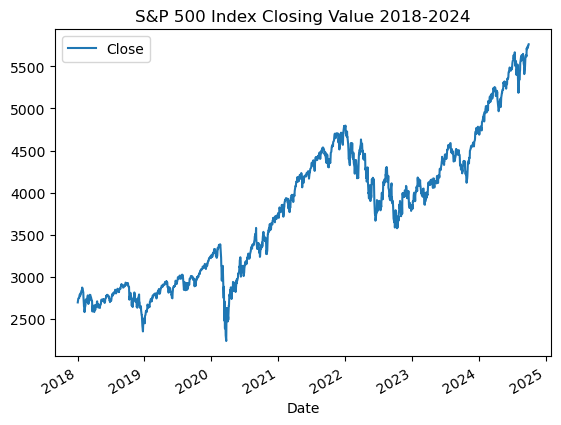

In [126]:
# Plot the closing value of S&P 500 stock index
sp500_data_2018_2024 = sp500_data.loc["2018-01-01":"2024-09-30"]
sp500_data_2018_2024.plot(title="S&P 500 Index Closing Value 2018-2024")


In [127]:
# Join by Columns and add stock tocker as the key
joined_data_cols = pd.concat([microsoft_data, google_data, apple_data, facebook_data, sp500_data], axis="columns", join="inner", keys=["MSFT", "GOOGL", "FB", "AAPL", "S&P 500"])
joined_data_cols

MSFT                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2016-01-04   54.320000   54.799999   53.389999   54.799999   48.434162   
2016-01-05   54.930000   55.389999   54.540001   55.049999   48.655128   
2016-01-06   54.320000   54.400002   53.639999   54.049999   47.771297   
2016-01-07   52.700001   53.490002   52.070000   52.169998   46.109684   
2016-01-08   52.369999   53.279999   52.150002   52.330002   46.251102   
...                ...         ...         ...         ...         ...   
2024-09-24  433.000000  433.350006  426.100006  429.170013  429.170013   
2024-09-25  429.829987  433.119995  428.570007  432.109985  432.109985   
2024-09-26  435.089996  435.299988  429.130005  431.309998  431.309998   
2024-09-27  431.519989  431.850006  427.470001  428.019989  428.019989   
2024-09-30  428.209991  430.420013  425.369995  430.299988  430.299988   

                           GOOGL                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2016-01-04  53778000   38.110001   38.110001   37.376999   37.972000  ...   
2016-01-05  34079700   38.205002   38.459999   37.782501   38.076500  ...   
2016-01-06  39518900   37.518501   38.286499   37.400002   37.966499  ...   
2016-01-07  56564900   37.324501   37.765499   36.764000   37.049999  ...   
2016-01-08  48754000   37.389999   37.506001   36.445999   36.545502  ...   
...              ...         ...         ...         ...         ...  ...   
2024-09-24  17015800  163.029999  163.220001  160.690002  162.289993  ...   
2024-09-25  13396400  161.470001  162.809998  161.300003  161.490005  ...   
2024-09-26  14492000  163.639999  164.080002  162.279999  162.729996  ...   
2024-09-27  14896100  162.809998  165.699997  162.630005  163.949997  ...   
2024-09-30  16807300  163.320007  166.149994  163.259995  165.850006  ...   

                    FB                               AAPL              \
                 Close   Adj Close     Volume        Open        High   
Date                                                                    
2016-01-04   26.337500   23.886839  270597600  101.949997  102.239998   
2016-01-05   25.677500   23.288246  223164000  102.889999  103.709999   
2016-01-06   25.174999   22.832500  273829600  101.129997  103.769997   
2016-01-07   24.112499   21.868870  324377600  100.500000  101.430000   
2016-01-08   24.240000   21.984503  283192000   99.879997  100.500000   
...                ...         ...        ...         ...         ...   
2024-09-24  227.369995  227.369995   43556100  566.679993  567.750000   
2024-09-25  226.369995  226.369995   42308700  564.049988  576.880005   
2024-09-26  227.520004  227.520004   36636700  575.729980  577.400024   
2024-09-27  227.789993  227.789993   34026000  570.099976  570.840027   
2024-09-30  233.000000  233.000000   54541900  567.700012  574.679993   

                                                          S&P 500  
                   Low       Close   Adj Close    Volume    Close  
Date                                                               
2016-01-04   99.750000  102.220001  101.913155  37912400  2012.66  
2016-01-05  101.669998  102.730003  102.421623  23258200  2016.71  
2016-01-06  100.900002  102.970001  102.660896  25096200  1990.26  
2016-01-07   97.300003   97.919998   97.626060  45172900  1943.09  
2016-01-08   97.029999   97.330002   97.037834  35402300  1922.03  
...                ...         ...         ...       ...      ...  
2024-09-24  554.190002  563.330017  563.330017  12993000  5732.93  
2024-09-25  563.719971  568.309998  568.309998  16543400  5722.26  
2024-09-26  562.349976  567.840027  567.840027  14400800  5745.37  
2024-09-27  564.510010  567.359985  567.359985   9398400  5738.

In [128]:
# Select only closing prices and volume for each stock
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_2018_2024 = closing_prices.loc["2018-01-01":"2024-09-30"]
closing_prices_2018_2024


,MSFT,GOOGL,FB,AAPL,S&P 500
,Close,Close,Close,Close,Close
Date,,,,,
2018-01-02,85.949997,53.660500,43.064999,181.419998,2695.81
2018-01-03,86.349998,54.576000,43.057499,184.669998,2713.06
2018-01-04,87.110001,54.787998,43.257500,184.330002,2723.99
2018-01-05,88.190002,55.514500,43.750000,186.850006,2743.15
2018-01-08,88.279999,55.710499,43.587502,188.279999,2747.71
...,...,...,...,...,...
2024-09-24,429.170013,162.289993,227.369995,563.330017,5732.93
2024-09-25,432.109985,161.490005,226.369995,568.309998,5722.26


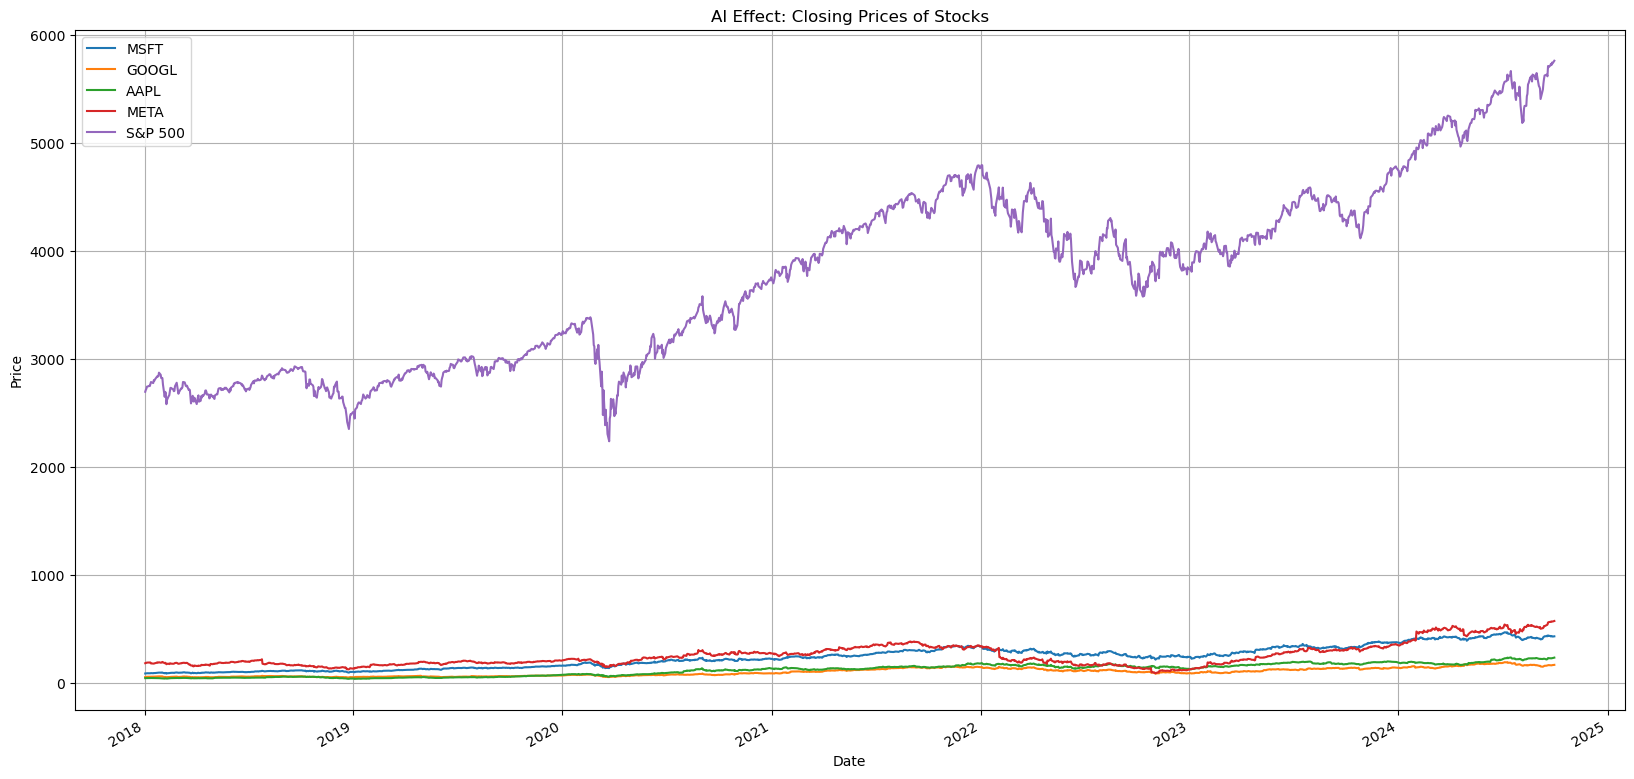

In [129]:
plot = closing_prices_2018_2024.plot(figsize=(20, 10), title="AI Effect: Closing Prices of Stocks")
plot.set_xlabel("Date")
plot.set_ylabel("Price")
plot.legend(["MSFT", "GOOGL", "AAPL", "META", "S&P 500"])
plot.grid()

In [131]:
# Calculate total returns for each stock from 2018-01-01 to 2024-09-30
start_prices = closing_prices_2018_2024.iloc[0]
end_prices = closing_prices_2018_2024.iloc[-1]
total_returns = ((end_prices - start_prices)/start_prices)*100
total_returns


MSFT     Close    400.639910
GOOGL    Close    209.072795
FB       Close    441.042627
AAPL     Close    215.533022
S&P 500  Close    113.756904
dtype: float64

In [132]:
# Calculate annualized average return for each stock from 2018-01-01 to 2024-09-30

annualized_returns = (closing_prices_2018_2024.pct_change().mean())*252*100
annualized_returns

MSFT     Close    28.192786
GOOGL    Close    21.534390
FB       Close    29.882271
AAPL     Close    26.201640
S&P 500  Close    13.287790
dtype: float64

<Axes: title={'center': 'S&P 500 Index Closing Value'}, xlabel='ds'>

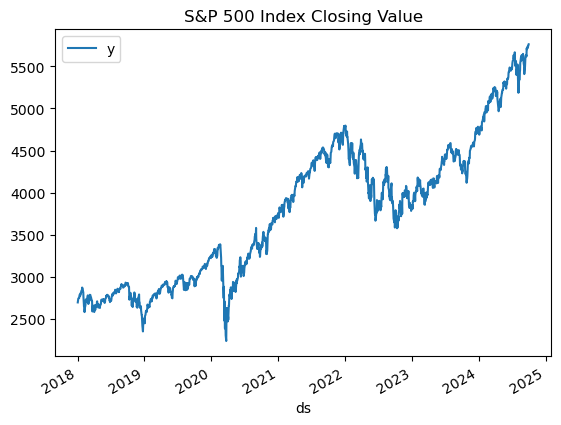

In [86]:
# Create a Dataframe for S&P 500 to include date and closing price
df_sp500 = sp500_data_2018_2024.reset_index()[["Date", "S&P500"]].rename(columns={"Date": "ds", "S&P500": "y"})

# Review the S&P 500 dataframe
df_sp500

df_sp500.plot(x="ds", y="y", title="S&P 500 Index Closing Value")


In [85]:
# Create a Prophet model for S&P 500 stock index
from prophet import Prophet
model_sp500 = Prophet()

# Fit the model with S&P 500 data
model_sp500.fit(df_sp500)

# Forecast for S&P 500 stock index for the next 2 years
future_sp500 = model_sp500.make_future_dataframe(periods=365, freq="D")
future_sp500.tail()

17:28:13 - cmdstanpy - INFO - Chain [1] start processing
17:28:14 - cmdstanpy - INFO - Chain [1] done processing


,ds
2057,2025-09-26
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30


In [72]:
volumes = joined_data_cols.loc[:, pd.IndexSlice[:, "Volume"]]
volumes

,MSFT,GOOGL,FB,AAPL
,Volume,Volume,Volume,Volume
Date,,,,
2016-01-04,53778000,67382000,270597600,37912400
2016-01-05,34079700,45216000,223164000,23258200
2016-01-06,39518900,48206000,273829600,25096200
2016-01-07,56564900,63132000,324377600,45172900
2016-01-08,48754000,47506000,283192000,35402300
...,...,...,...,...
2024-09-24,17015800,23332100,43556100,12993000
2024-09-25,13396400,18869200,42308700,16543400


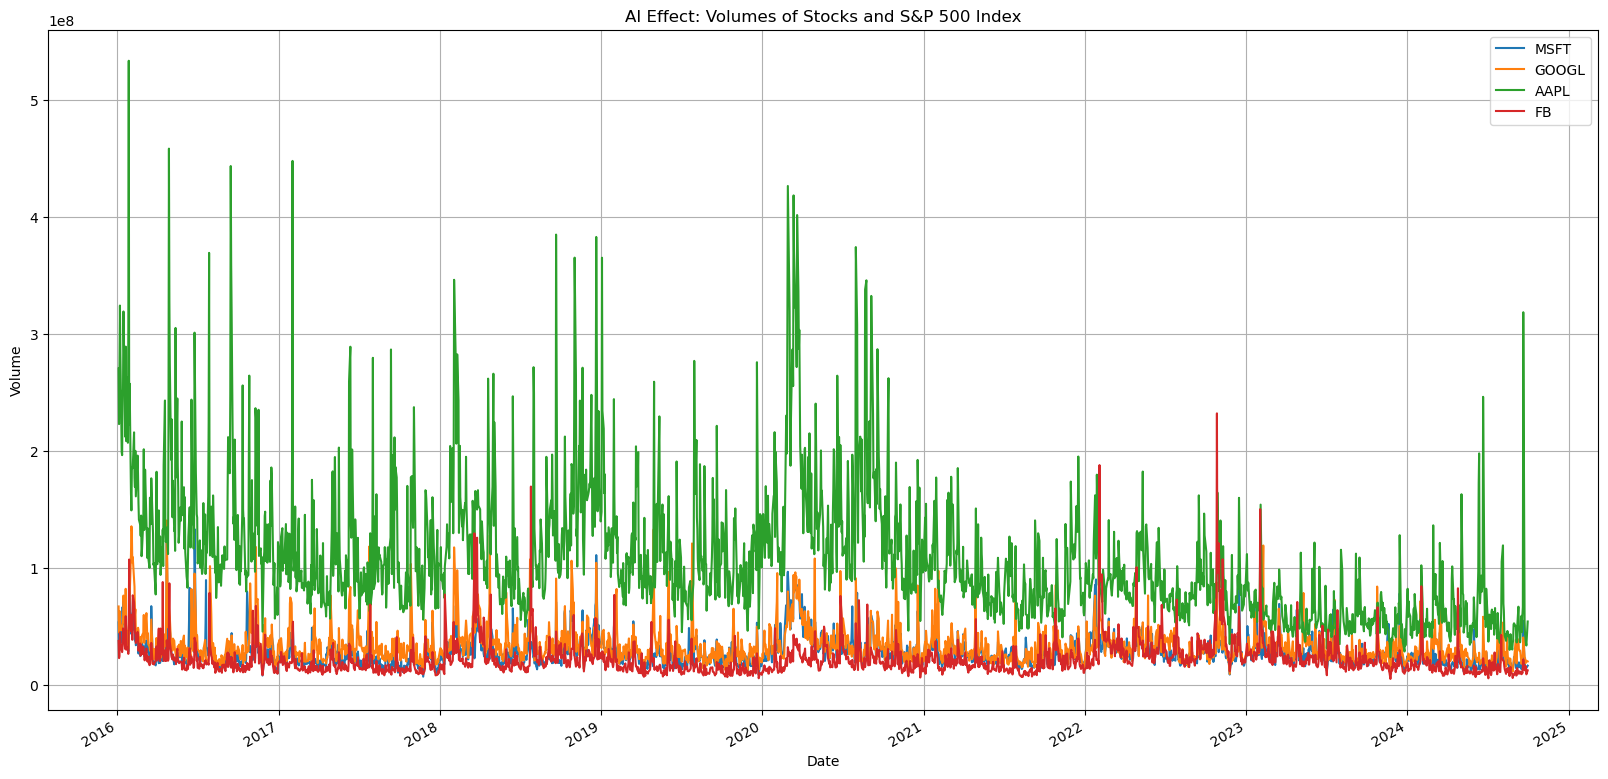

In [73]:
plot = volumes.plot(kind="line", figsize=(20, 10), title="AI Effect: Volumes of Stocks and S&P 500 Index")
plot.set_xlabel("Date")
plot.set_ylabel("Volume")
plot.legend(["MSFT", "GOOGL", "AAPL", "FB"])
plot.grid()